# Init

In [38]:
import pickle
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

In [27]:
with open('pickle/dt_final.p', 'rb') as f:
    dt_final = pickle.load(f)

with open('pickle/svm_linear.p', 'rb') as f:
    svm_linear = pickle.load(f)

with open('pickle/knn_grid.p', 'rb') as f:
    knn_grid = pickle.load(f)

In [28]:
with open('pickle/df_reduced.p', 'rb') as f:
    df_reduced = pickle.load(f)

In [29]:
X = df_reduced.drop('Class', axis=1)
y = df_reduced['Class']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Voting

In [31]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dt_final),
    ('svm', svm_linear),
    ('knn', knn_grid)
], voting='soft')

In [32]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('decision_tree',
                              DecisionTreeClassifier(max_depth=7,
                                                     random_state=42)),
                             ('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=42)),
                             ('knn',
                              KNeighborsClassifier(n_jobs=-1, n_neighbors=9))],
                 voting='soft')

In [33]:
y_pred_voting = voting_clf.predict(X_test)

In [34]:
print("Classification Report:\n", classification_report(y_test, y_pred_voting))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.79      0.84        98

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



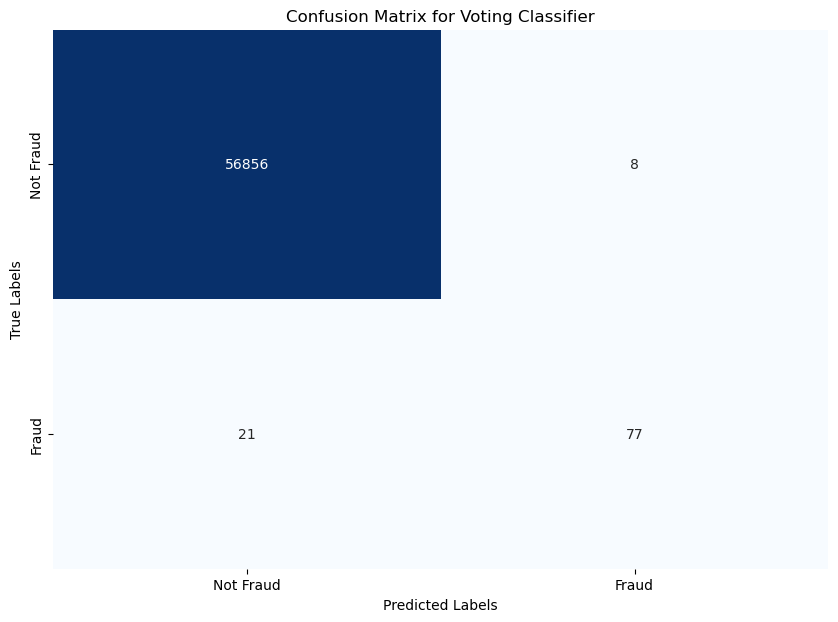

In [39]:
plot_confusion_matrix(y_test, y_pred_voting, title='Confusion Matrix for Voting Classifier')

# Random Forest